In [1]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from PIL import Image

In [3]:
def list_files_local(path):
    """ Get file list form local folder. """
    from glob import glob
    return glob(path)

## What is RGB?? 

In [50]:
### display an image 
img = Image.open('images/RGB.jpg') 
plt.imshow(img)

### first, let's just display an image: 

<IPython.core.display.Javascript object>


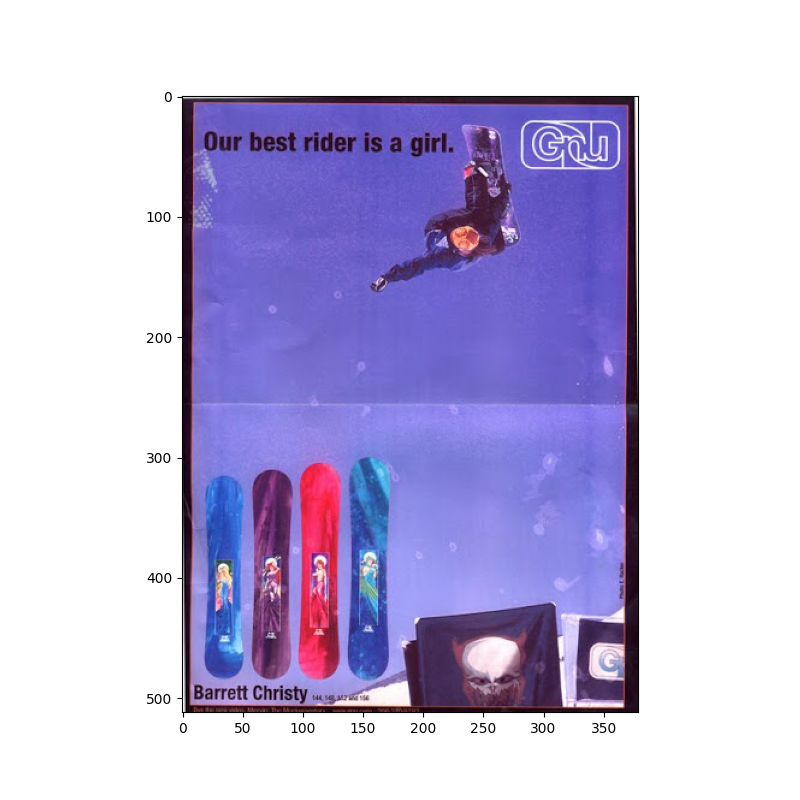

In [51]:
pic = imageio.imread('images/BChristy.jpg')
plt.figure(figsize = (8,8))

plt.imshow(pic)

### What the heck is RGB? 

<IPython.core.display.Javascript object>


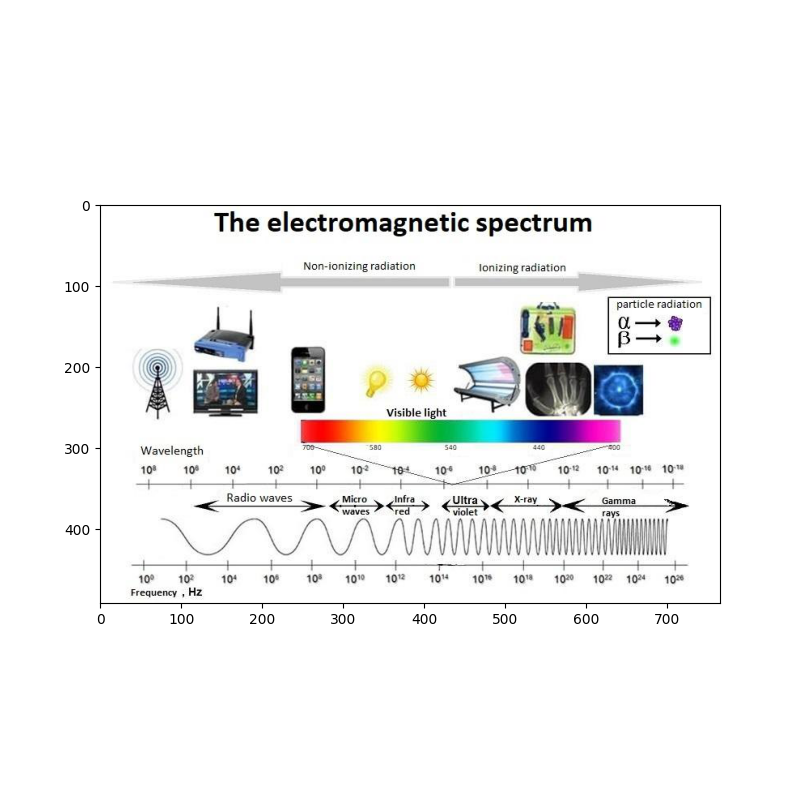

In [52]:
pic = imageio.imread('images/RGB_colors.png')
plt.figure(figsize = (8,8))

plt.imshow(pic)

### Now, you try to make a color: 

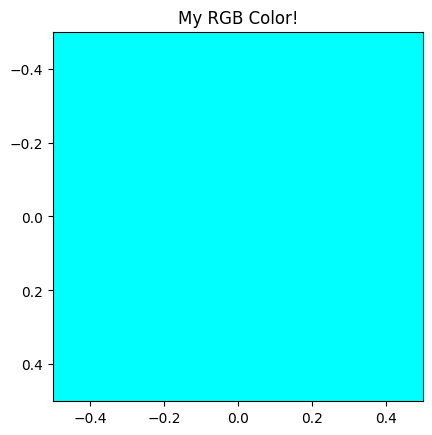

In [7]:
## define the intensity of each color below: 
## example: 
red = 0
blue = 255
green = 255

plt.title("My RGB Color!")
plt.imshow([[(red, green, blue)]])

## now, let's split our image into different channels: 
### what do you notice?? what is that red snowboard doing?

In [8]:
## our "function"  which will do the splitting for us: 
def rgb_split(pic):
    fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

    for c, ax in zip(range(3), ax):

        # create zero matrix
        split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'

        # assing each channel 
        split_img[ :, :, c] = pic[ :, :, c]

        # display each channel
        ax.imshow(split_img)


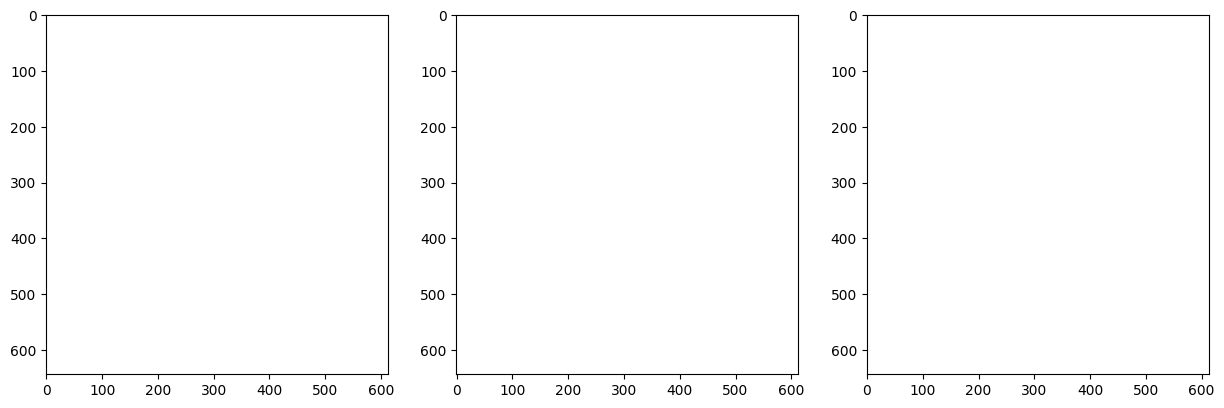

In [9]:
rgb_split(pic)

## Now, a color histogram: 

In [10]:
### how to evaluate the intensity of blue? 
# tuple to select colors of each channel line
def color_histogram(pic):
    colors = ("red", "green", "blue")

    # create the histogram plot, with three lines, one for
    # each color
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            pic[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")

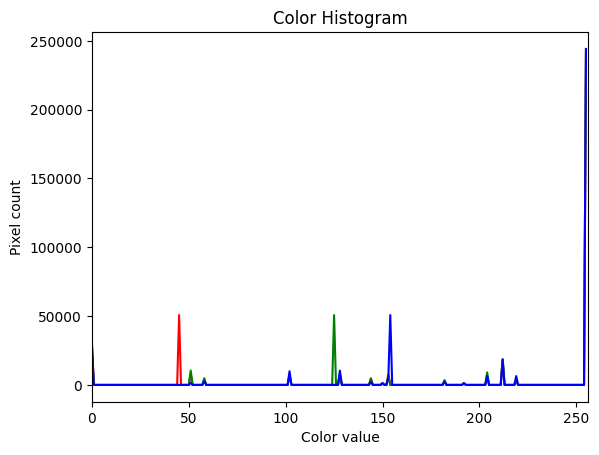

In [11]:
color_histogram(pic)

### Okay, now you try upload a photo, then let's see what colors it is made of: 

In [12]:
#my_image = 'your_image_name_here.jpg'

In [13]:
#pic = imageio.imread(my_image)
#plt.figure(figsize = (15,15))

#plt.imshow(pic)

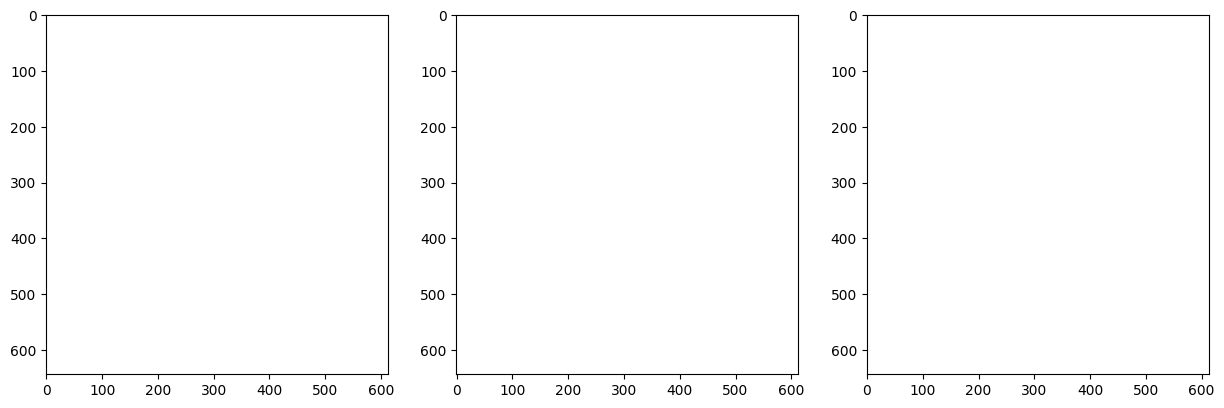

In [14]:
### RGB split images
rgb_split(pic)

<IPython.core.display.Javascript object>


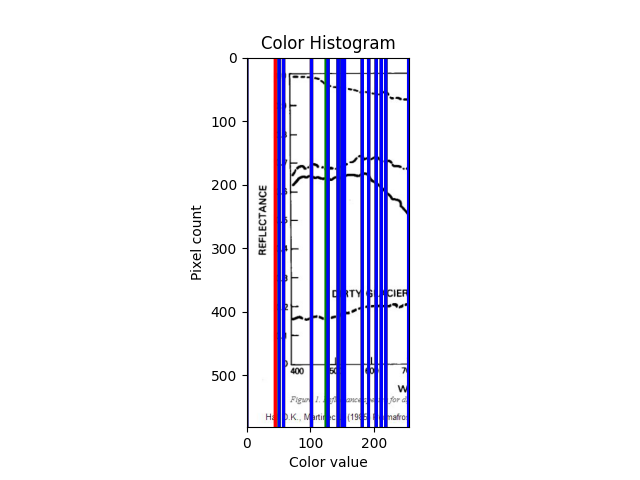

In [56]:
#### Color histogram
color_histogram(pic)

### Why is this useful for environmental data proccessing? 

In [55]:
img = Image.open('images/EM_spectrum.jpg') 
plt.imshow(img)

In [54]:
img = Image.open('images/radar_backscatter.jpg') 
plt.imshow(img)

## What is Albedo? why is it important?

In [57]:
img = Image.open('images/albedo_diagram.png') 
plt.imshow(img)

In [58]:
img = Image.open('images/reflectance.jpg') 
plt.imshow(img)

## Doesn't this ice look rather dusty? 

<IPython.core.display.Javascript object>


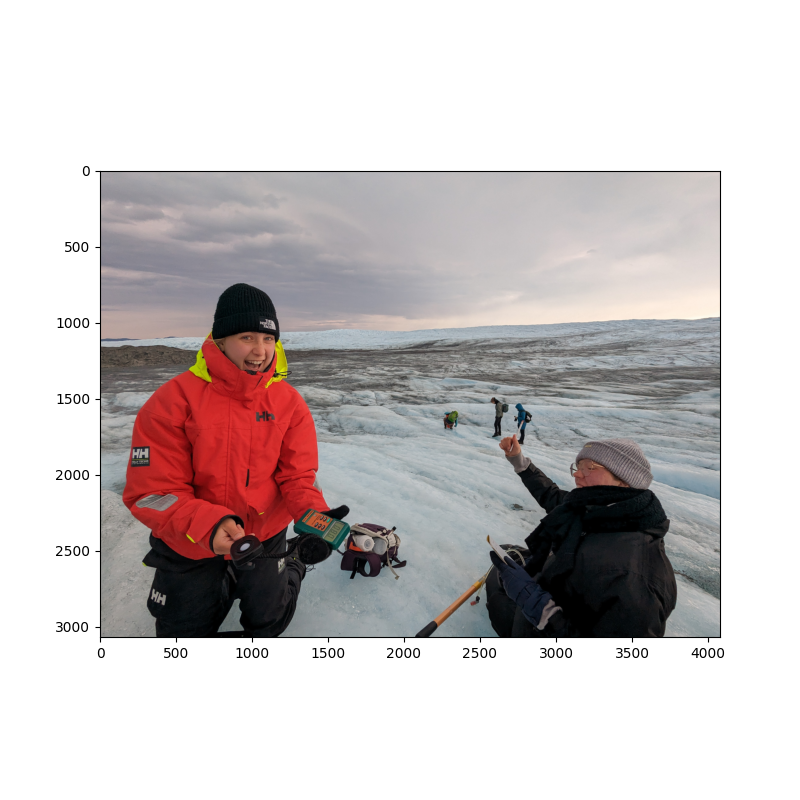

In [59]:
img = Image.open('images/radiometer.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

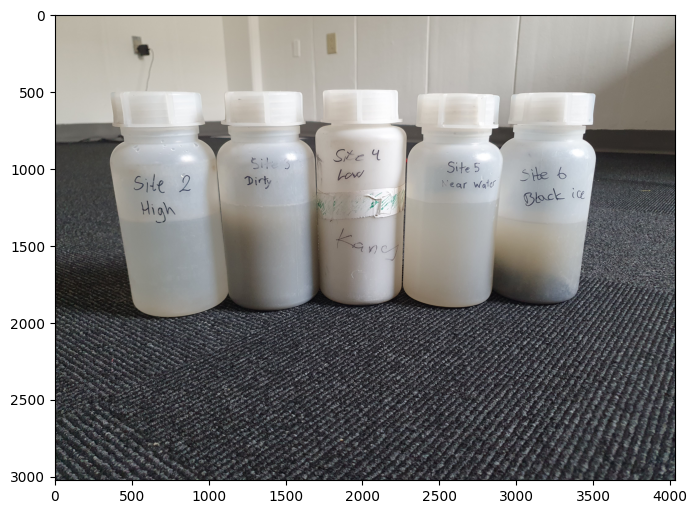

In [21]:
img = Image.open('images/samples.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

<IPython.core.display.Javascript object>


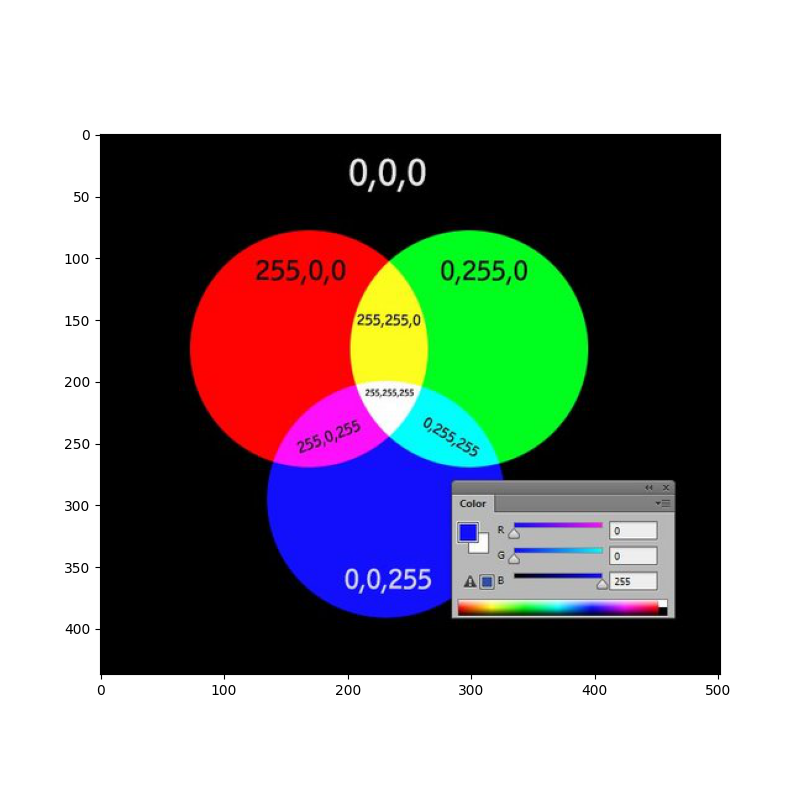

In [48]:
img = Image.open('images/scaled_dust.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

## Let's take a look at this data: 

https://docs.google.com/spreadsheets/d/1JB4fcoNF7VHK1kxeCf-BsnT3wdSEJnwIz2xW-6K4laI/edit?usp=sharing 

In [23]:
## give the files a name to work with
## the *  at end tells the computer that I want to see all the files in that folder! 
snow_pics1 = list_files_local('snow_day1/*')
snow_pics2 = list_files_local('snow_day2/*')

In [24]:
### print out all the file names 
snow_pics1

['snow_day1\\snow2.jpg',
 'snow_day1\\snow3.jpg',
 'snow_day1\\snow4.jpg',
 'snow_day1\\snow5.jpg',
 'snow_day1\\snow6.jpg']

In [25]:
### go through and for each find the luminance: 
def function(picture_list):
    blue_list = []
    lum_list = []
    for img in picture_list: 
        pic = imageio.imread(img)

        ### let's make arrays for R, G, and B: 
        RED = pic[ : , : , 0] /255
        BLUE = pic[ : , : , 1] /255
        GREEN = pic[ : , : , 2] /255

        LUMINANCE = (0.2126*RED + 0.7152*GREEN + 0.0722*BLUE)

        lum = np.asarray(LUMINANCE)
        blu = np.asarray(BLUE)
        L_value =np.sum(lum)
        blueness = np.sum(blu)

        lum_list.append(L_value / (pic.shape[0]*pic.shape[1]))
        blue_list.append(blueness/ (pic.shape[0]*pic.shape[1])) 
        
    return lum_list, blue_list

In [26]:
## call our function: 

### day 1:
luminance_day1, blue_day1 = function(snow_pics1)

### day 2:
luminance_day2, blue_day2 = function(snow_pics2)

In [27]:
### albedo array: 
albedo_day1 = [ 0.27, 0.1, 0.22, 0.11, 0.06]
albedo_day2 = [0.28, 0.31, 0.25, 0.09, 0.11, 0.11, 0.09, 0.15]

### plotting: 

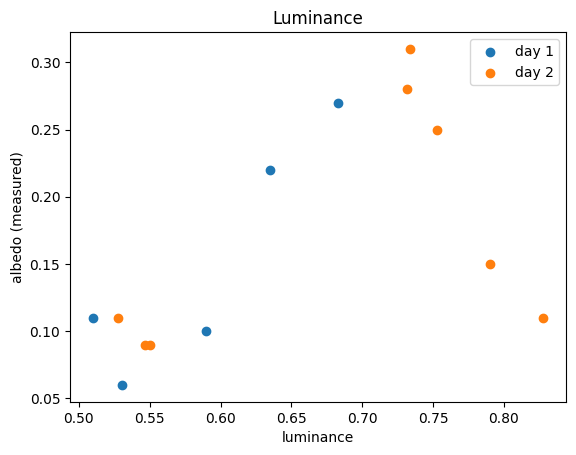

In [28]:
### let's plot our luminance: 
plt.scatter(luminance_day1, albedo_day1, label= 'day 1')
plt.scatter(luminance_day2, albedo_day2, label= 'day 2')
plt.title("Luminance")
plt.xlabel("luminance")
plt.ylabel("albedo (measured)")
plt.legend()

### plotting "blueness"!

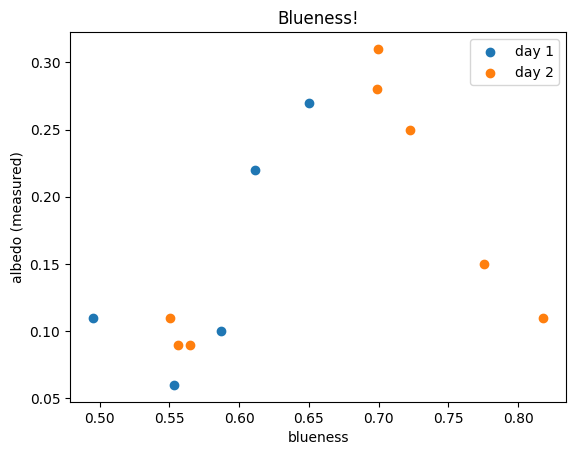

In [29]:
plt.scatter(blue_day1, albedo_day1, label= 'day 1')
plt.scatter(blue_day2, albedo_day2, label= 'day 2')
plt.title("Blueness!")
plt.xlabel("blueness")
plt.ylabel("albedo (measured)")
plt.legend()

### Introduce what students measured at point 660, and why albedo might not capture this? 

In [30]:
### how does this compare to the data students collected?
particles_day1 = [9.7,23.4, 5.6, 5.9,465.2 ] 
particles_day2 = [ 0.2, 0.4, 0.4, 0.8, 19.0, 4.4, 274.1, 1.3]

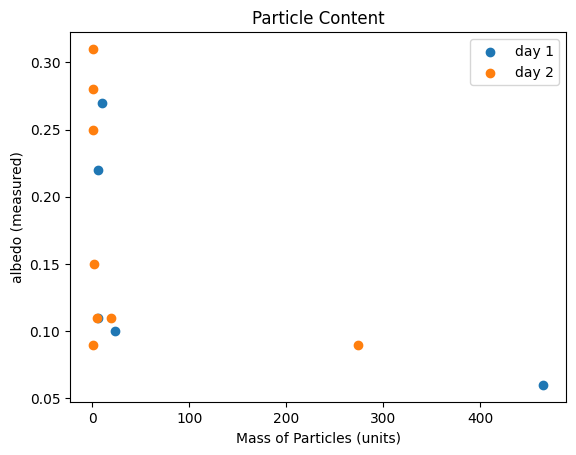

In [31]:
plt.scatter(particles_day1, albedo_day1, label= 'day 1')
plt.scatter(particles_day2, albedo_day2, label= 'day 2')
plt.title("Particle Content")
plt.xlabel("Mass of Particles (units)")
plt.ylabel("albedo (measured)")
plt.legend()

# CHALLENGE/ INVESTIGATE: 
I want you to show the image of one of these points, the file name popping up from hovering over the point in jupyter notebook, does the point match the data?

In [ ]:
### YOUR CODE HERE TO PRINT IMAGE! 

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


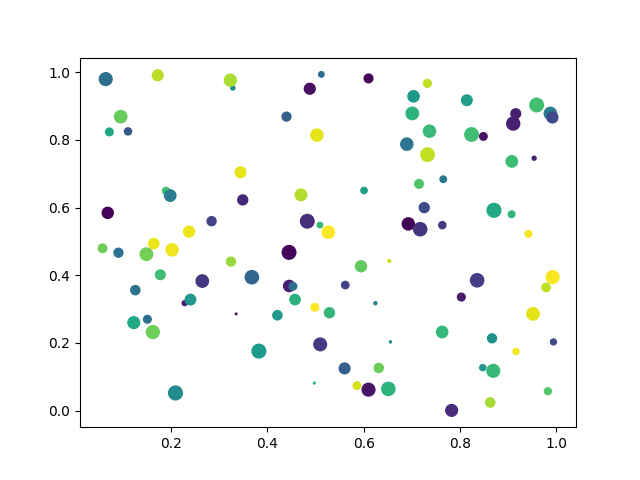

In [35]:
from matplotlib.pyplot import figure, show
import numpy as npy
from numpy.random import rand


if 1: # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)
    def onpick3(event):
        ind = event.ind
        print('onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind))

    fig = figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

show()

<IPython.core.display.Javascript object>


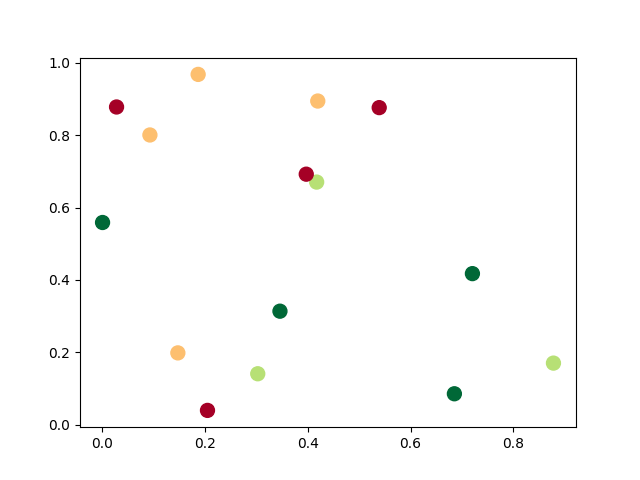

In [37]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

<IPython.core.display.Javascript object>


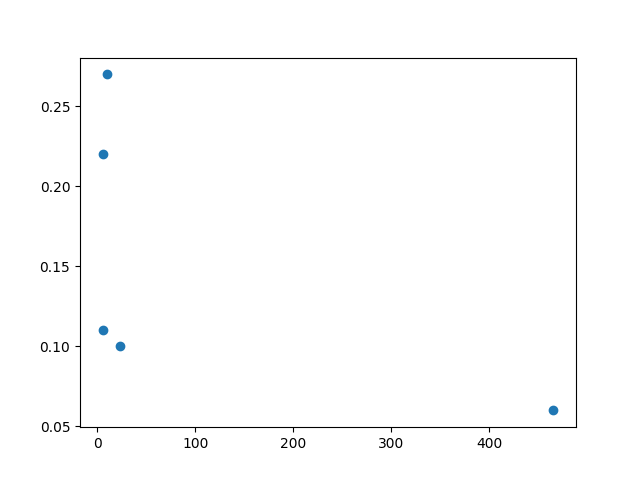

In [46]:
#names = np.array(list("ABCDEFGHIJKLMNO"))
names = np.array(list(snow_pics1))
#c = np.random.randint(1,5,size=15)

#norm = plt.Normalize(1,4)
#cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(particles_day1, albedo_day1)
#sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

#text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           #" ".join([names[n] for n in ind["ind"]]))

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [47]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r)) 

matplotlib==3.4.3
Pillow==9.3.0
imageio==2.19.3
numpy==1.23.5
